<a href="https://colab.research.google.com/github/Tarungeed/Heart-diease-prediction-/blob/main/Heart_diease_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  HEART DIEASE PREDICTION 

 Importing the libraries 

In [238]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

Data collection and Preprocessing

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
heart_data = pd.read_csv('/content/drive/MyDrive/ML classification /data_cardiovascular_risk.csv')

In [241]:
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [242]:
heart_data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [243]:
heart_data.shape

(3390, 17)

In [244]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [245]:
# change objects into integer values 


In [246]:
heart_data.value_counts()

id    age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
1     36   4.0        M    NO          0.0         0.0     0                1             0         212.0    168.0  98.0   29.77  72.0       75.0     0             1
2259  51   2.0        M    YES         20.0        0.0     0                0             0         274.0    108.0  75.0   23.60  70.0       68.0     0             1
2261  60   3.0        F    NO          0.0         0.0     0                0             0         325.0    123.0  79.0   25.82  63.0       85.0     0             1
2262  57   1.0        M    NO          0.0         0.0     0                0             1         300.0    121.0  74.0   28.09  80.0       155.0    1             1
2263  38   2.0        F    YES         9.0         0.0     0                0             0         180.0    124.0  66.0   29.29  85.0       68.0     0             1
         

In [247]:
categorical_features=list(heart_data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [248]:
heart_data.loc[heart_data['sex']== 'F'].replace('F','0',inplace = True)
heart_data.loc[heart_data['sex']== 'M'].replace('M','1',inplace = True)

In [249]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [250]:
# checking for nmissing values 

In [251]:
heart_data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

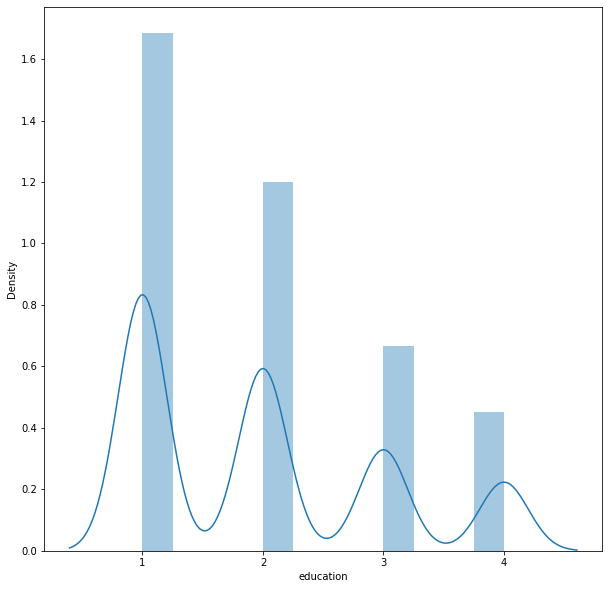

In [252]:
#as there are some missing values like in education , cigsperday , BPMeds, totChol, BMI, hearrate, glucose 
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(heart_data.education)

In [253]:
heart_data['education'].fillna(heart_data['education'].median(),inplace=True)

In [254]:
heart_data.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [255]:
##as above we fill the null , missing values in the column education , the same thing we will do for all the colunmns which have missing or null values

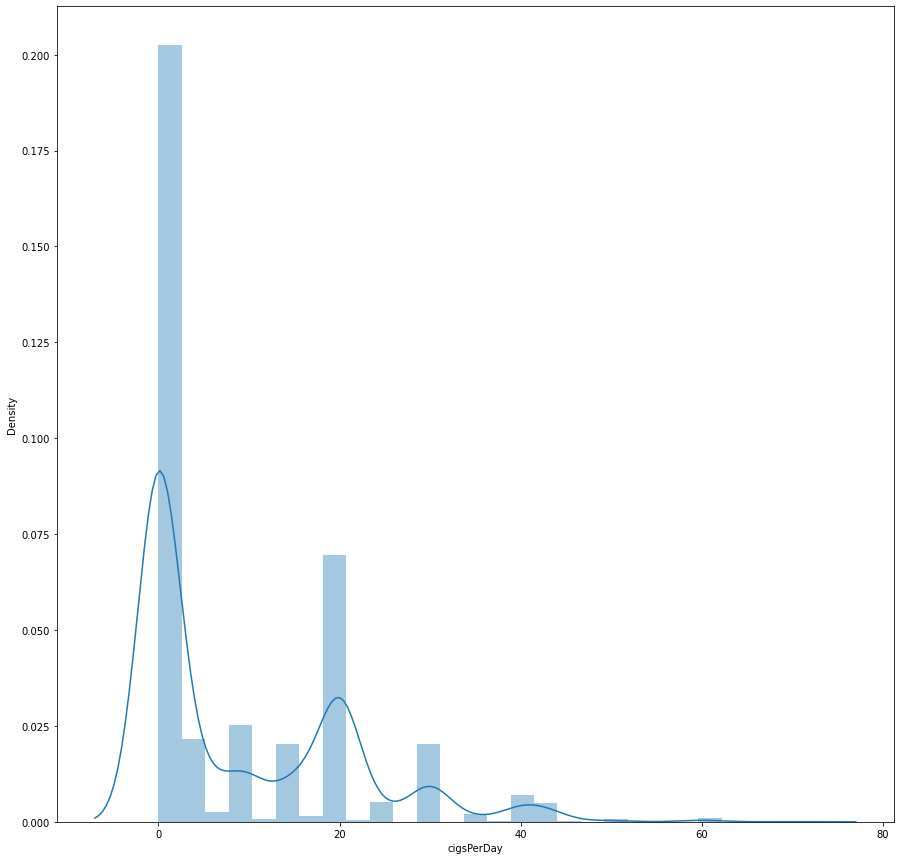

In [256]:
fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(heart_data.cigsPerDay)

In [257]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].median(),inplace=True)
heart_data['BPMeds'].fillna(heart_data['BPMeds'].median(),inplace=True)
heart_data['totChol'].fillna(heart_data['totChol'].median(),inplace=True)
heart_data['BMI'].fillna(heart_data['BMI'].median(),inplace=True)


In [258]:
heart_data.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [259]:
heart_data['heartRate'].fillna(heart_data['heartRate'].mean(),inplace=True)

In [260]:
heart_data['glucose'].fillna(heart_data['glucose'].mean(),inplace=True)

In [261]:
heart_data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [262]:
#now there are no missing and null values present in the data

In [263]:
heart_data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971681,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.005925,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970102,23.131808,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [264]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.7500,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.971681,1.005925,1.00,1.00,2.00,3.0000,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0
totChol,3390.0,237.039823,44.994205,107.00,206.00,234.00,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.0000,295.0


In [265]:
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Congenital heart defects (CHDs) are the most common type of birth defect.

In [266]:
#checking the distribution of TenYearCHD  
heart_data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

1--->>> defect heart

0--->> Healthy heart



##Exploratory Data Analysis

##UNIVARIATE ANALYSIS

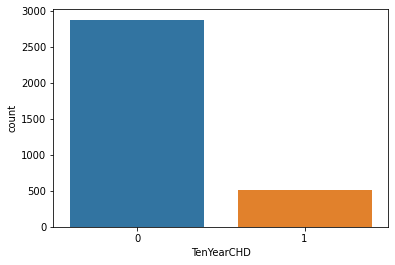

In [267]:
sns.countplot(heart_data['TenYearCHD'])

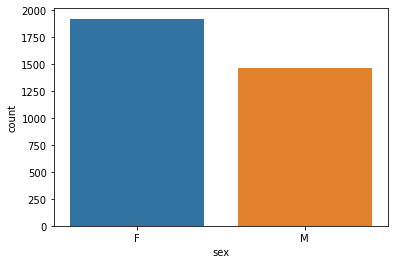

In [268]:
sns.countplot(heart_data['sex'])

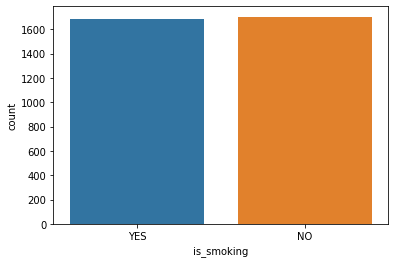

In [269]:
sns.countplot(heart_data['is_smoking'])

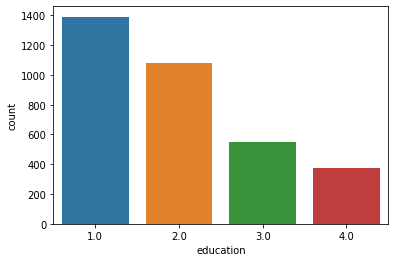

In [270]:
sns.countplot(heart_data['education'])

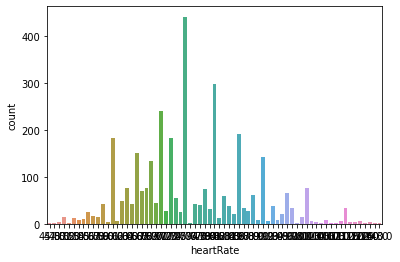

In [271]:
sns.countplot(heart_data['heartRate'])

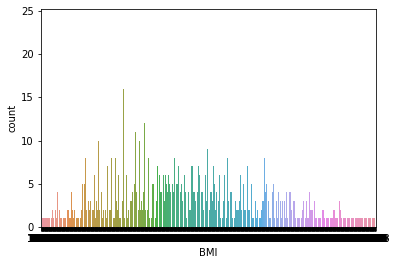

In [272]:
sns.countplot(heart_data['BMI'])

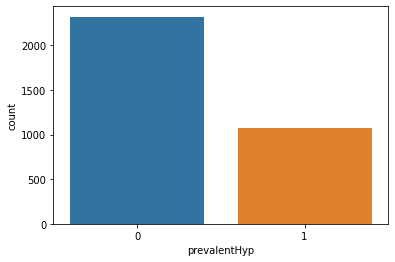

In [273]:
sns.countplot(heart_data['prevalentHyp'])

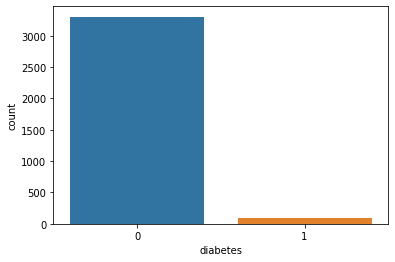

In [274]:

sns.countplot(heart_data['diabetes'])

In [275]:
# Creating a list for different column types
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

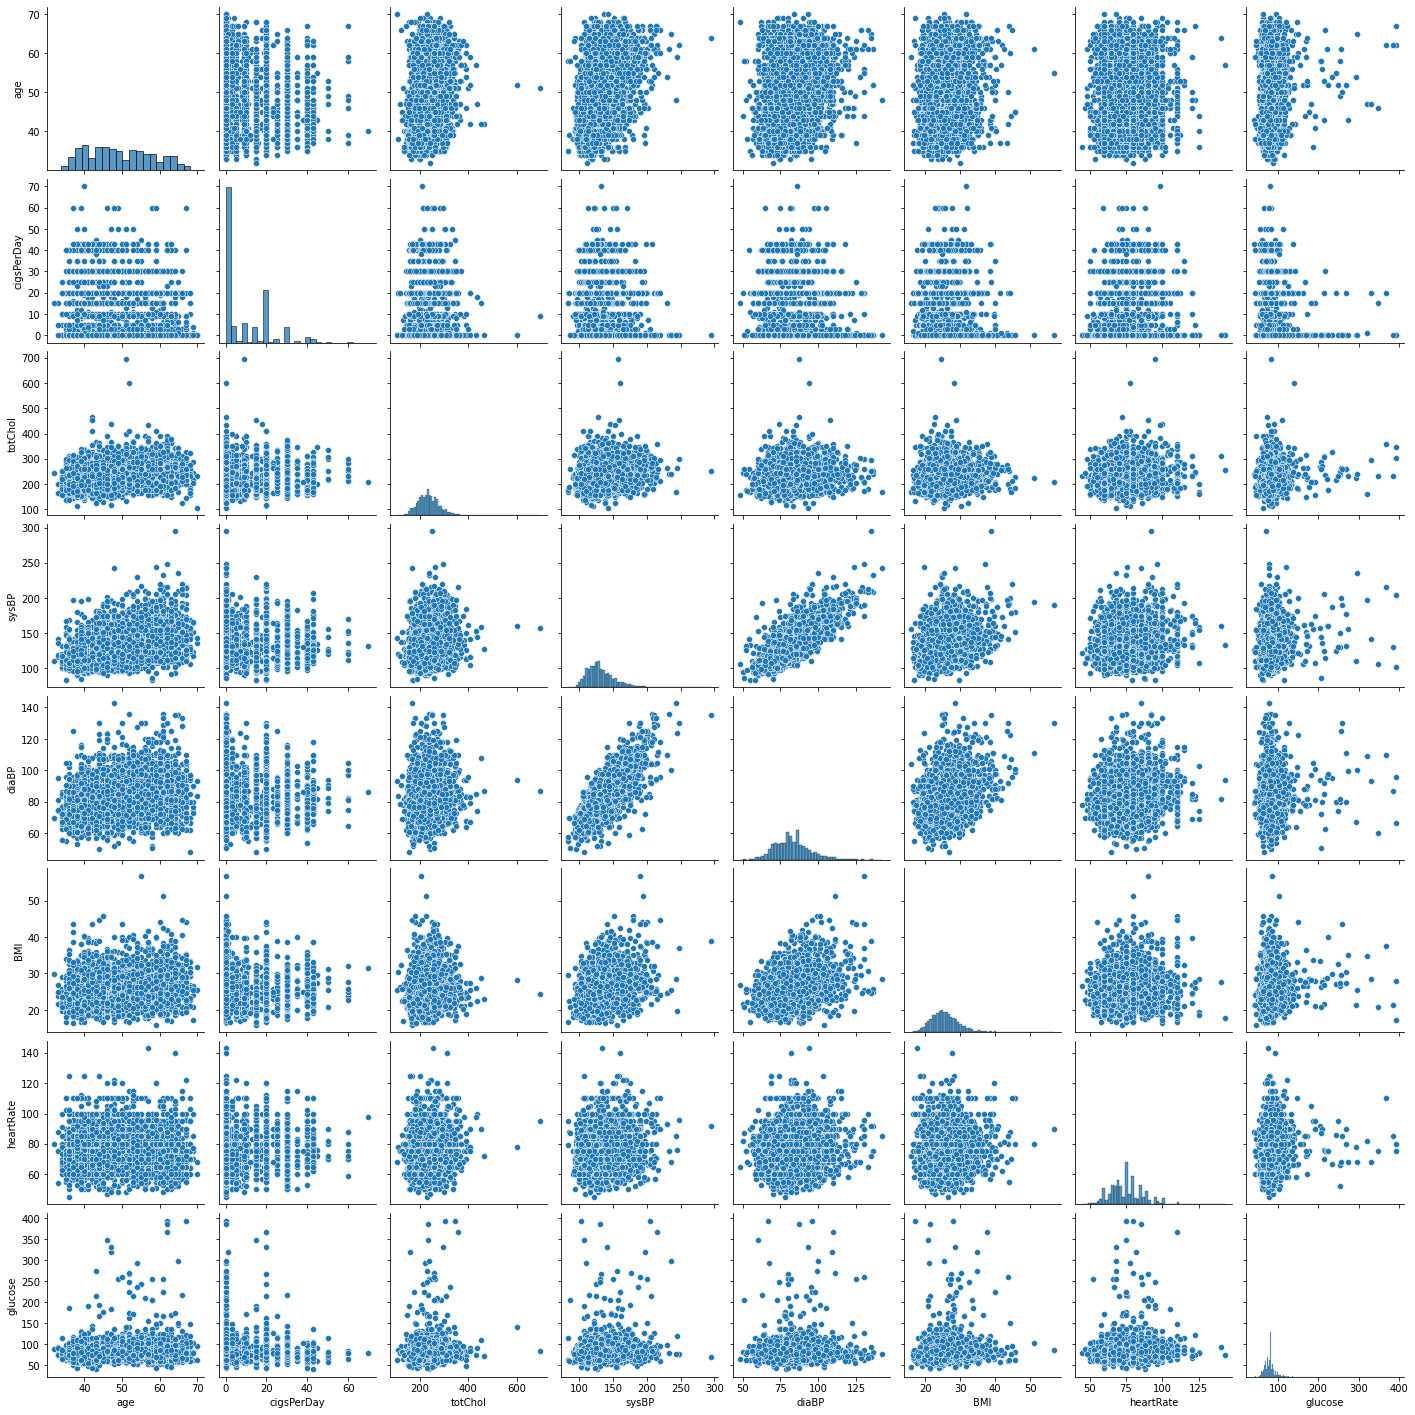

In [276]:
sns.pairplot(heart_data[numerical_columns])

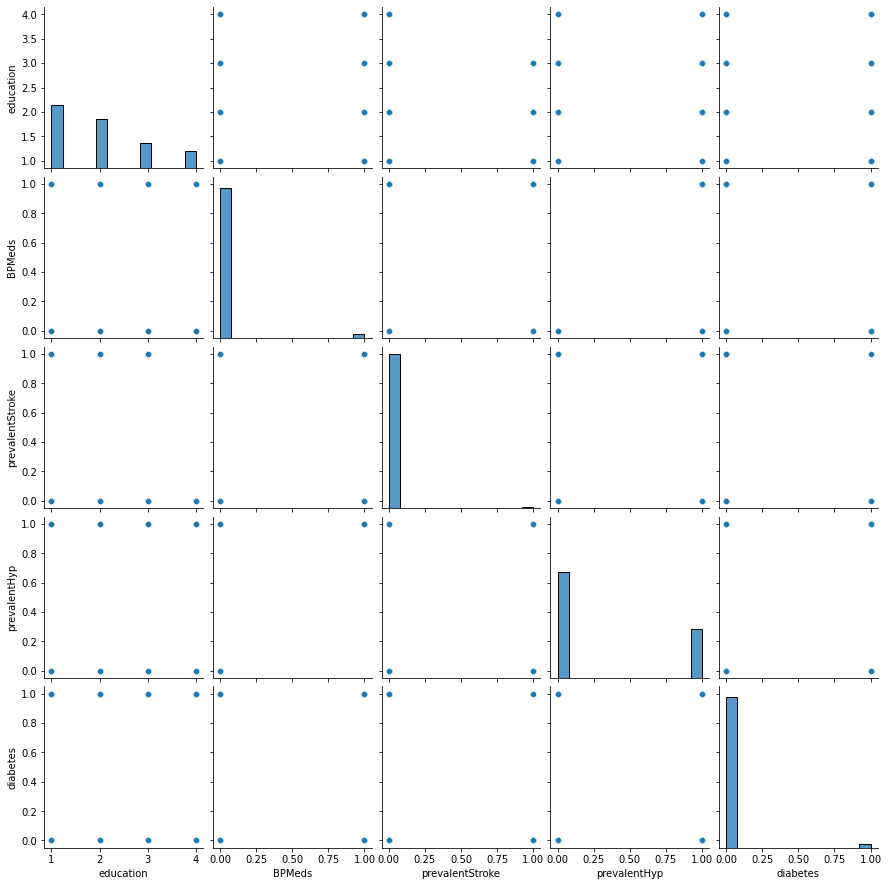

In [277]:
sns.pairplot(heart_data[categorical_columns])

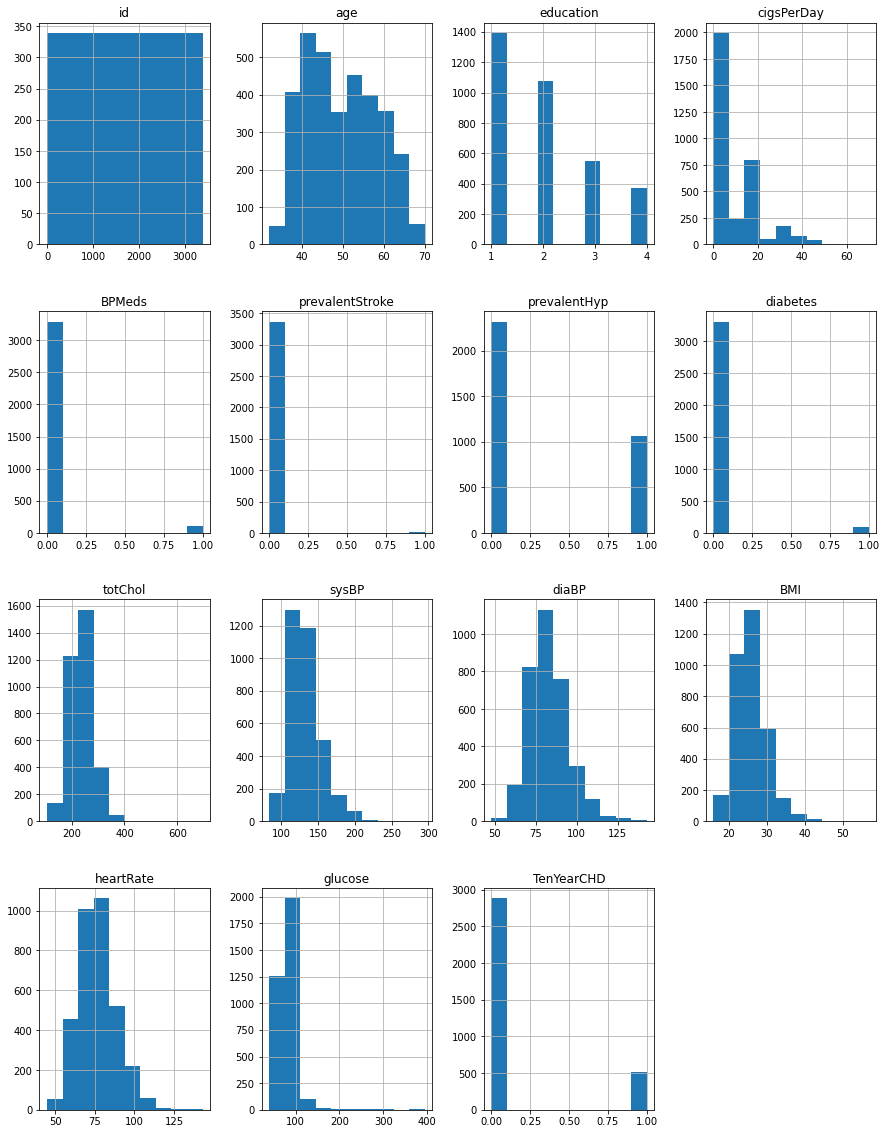

In [278]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)
plt.show()

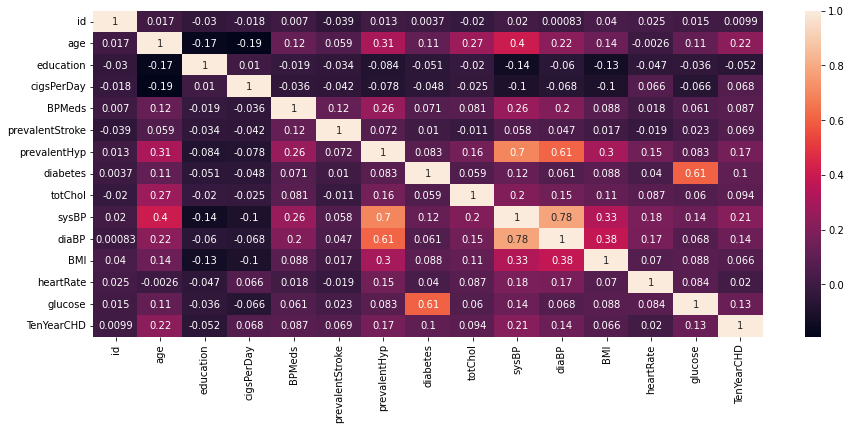

In [279]:
plt.figure(figsize=(15,6))
sns.heatmap(heart_data.corr(), annot = True)

##From the heatmap we can understand that :
Highest correlation exists between systolic BP and diastolic BP that is 0.78


In [280]:
# Dropping the 'is_smoking' column
heart_data.drop('is_smoking', axis = 1, inplace = True)

In [281]:
heart_data.head(2)
           

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


##Sex is a categorical column
have to change it to numerical one 

In [282]:
heart_data['sex'] =heart_data['sex'].apply(lambda x: 1 if x=='M' else 0)

In [283]:
heart_data.head(2)

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [284]:
heart_data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [285]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [286]:
# Creating an instance for SMOTE
smote = SMOTE()

In [287]:
# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'sex']
dependent_variable = 'TenYearCHD'
X = heart_data.loc[:, independent_variables]
y = heart_data[dependent_variable]

In [288]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 3390 rows and 12 columns
y has 3390 rows


In [289]:
# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)

In [290]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


In [291]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


In [292]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scaling the independent variables
X = scaler.fit_transform(X)

##Model Building and Evaluation
Mainly 5 models will be tried and tested in this project
1. Logistic Regression
2. Random Forest
3. XGB Classifier
4. KNN
5. SVM

In [293]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

In [294]:
algo_models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [295]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

##Knn

In [296]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)

In [297]:
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.93356492 0.89470256 0.87038645 0.85388624 0.82978723
 0.81936604 0.80590534 0.79765523 0.78679983]
Test Accuracy:  [0.80729167 0.77256944 0.77517361 0.76041667 0.75347222 0.75173611
 0.75347222 0.74739583 0.74739583 0.75260417]


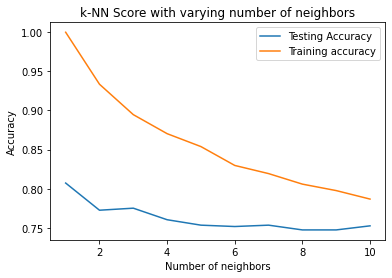

In [298]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

test score is increasing as number of neighbours increases.



##Let's try to find best parameter for knn

In [299]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [300]:
knn = KNeighborsClassifier()
knn_heart_data= GridSearchCV(knn,param_grid,cv=5)
knn_heart_data.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [301]:
knn_heart_data.best_score_

0.790054430132295

In [302]:
knn_heart_data.best_params_

{'n_neighbors': 1}

In [303]:
# predictions
knn_predict = knn_cv.predict(X_test)

In [304]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       602
           1       0.79      0.89      0.84       550

    accuracy                           0.83      1152
   macro avg       0.84      0.83      0.83      1152
weighted avg       0.84      0.83      0.83      1152



##Logistic Regression

In [305]:
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [306]:
logistic_regression_model.coef_

array([[ 3.24785081, -0.11853785,  2.47704605,  1.06715231, -0.34994832,
        -0.36194373, -0.38949327,  1.37112056,  1.70475165, -0.2385723 ,
         3.10800115, -0.47052865]])

In [307]:
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

[[1471  806]
 [ 726 1603]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

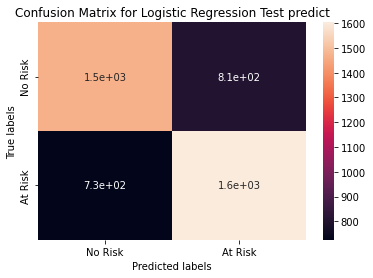

In [308]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[383 219]
 [173 377]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

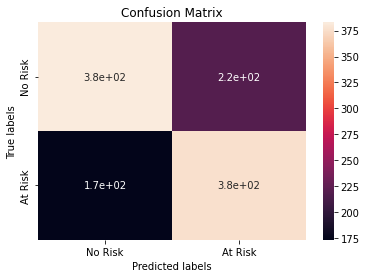

In [309]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [310]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6608335850196316
Accuracy score: 0.6597222222222222
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2277
           1       0.67      0.69      0.68      2329

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606



              precision    recall  f1-score   support

           0       0.69      0.64      0.66       602
           1       0.63      0.69      0.66       550

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



##Desicion Tree Model


Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.



In [311]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

#Predicting on test cell and train cell

In [312]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [314]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 76.82291666666666
the training accuracy is 80.2648719062093


In [315]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 76.82291666666666
the training accuracy is 80.2648719062093


[[1794  483]
 [ 426 1903]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

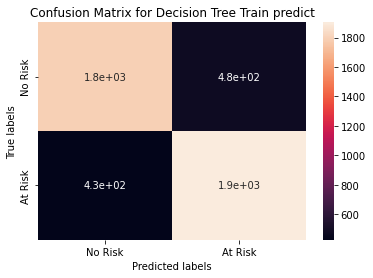

In [316]:
#confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[450 152]
 [115 435]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

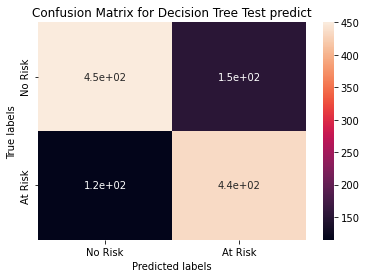

In [317]:
# confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [318]:
#train report
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2277
           1       0.80      0.82      0.81      2329

    accuracy                           0.80      4606
   macro avg       0.80      0.80      0.80      4606
weighted avg       0.80      0.80      0.80      4606



In [319]:
#test report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       602
           1       0.74      0.79      0.77       550

    accuracy                           0.77      1152
   macro avg       0.77      0.77      0.77      1152
weighted avg       0.77      0.77      0.77      1152



## Random Forest

In [320]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [321]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [322]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [323]:
accuracy_score(y_train,train_preds)

0.9958749457229701

In [324]:
accuracy_score(y_test,test_preds)

0.8836805555555556

In [325]:
roc_auc_score(y_train,train_preds)

0.9959013850868911

[[2273    4]
 [  15 2314]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

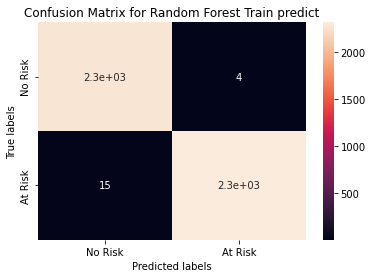

In [326]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[543  59]
 [ 75 475]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

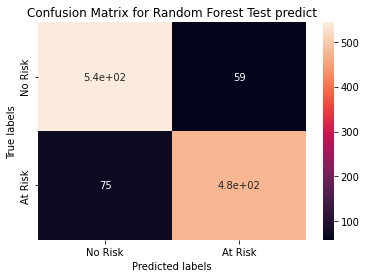

In [327]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [328]:
#classification  for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2277
           1       1.00      0.99      1.00      2329

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [329]:
#classification  for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       602
           1       0.89      0.86      0.88       550

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152



In [330]:
## XG boost

##XG BOOST

In [332]:
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [333]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [334]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [335]:
accuracy_score(y_train,train_preds)

0.7989578810247503

In [336]:

accuracy_score(y_test,test_preds)

0.9539930555555556

In [337]:
roc_auc_score(y_test,test_preds)

0.9527604953186348

In [338]:
roc_auc_score(y_train,train_preds)

0.7997657233940766

[[1984  293]
 [ 633 1696]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

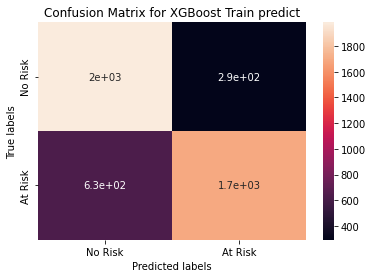

In [339]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[590  12]
 [ 41 509]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

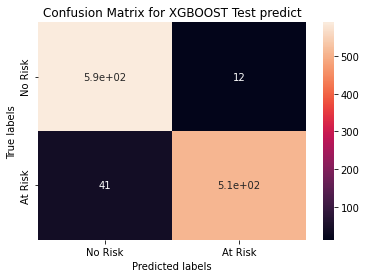

In [340]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

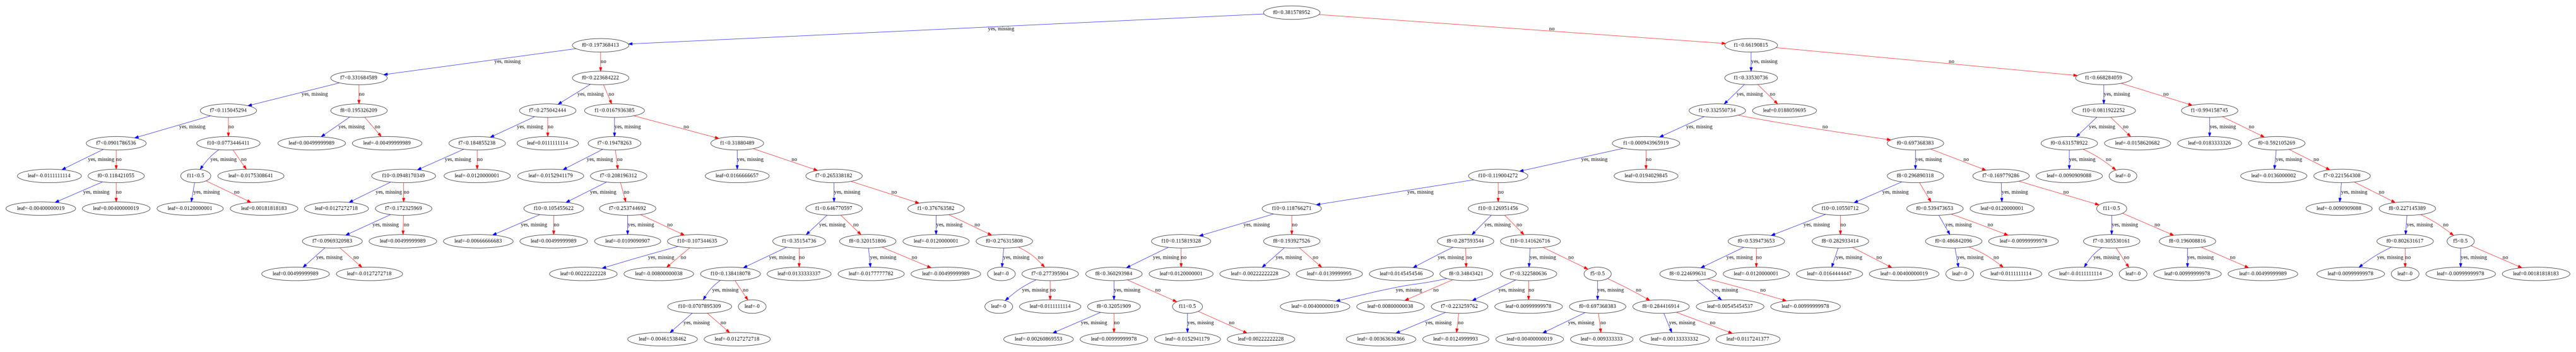

In [341]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100, 10)
plt.show()


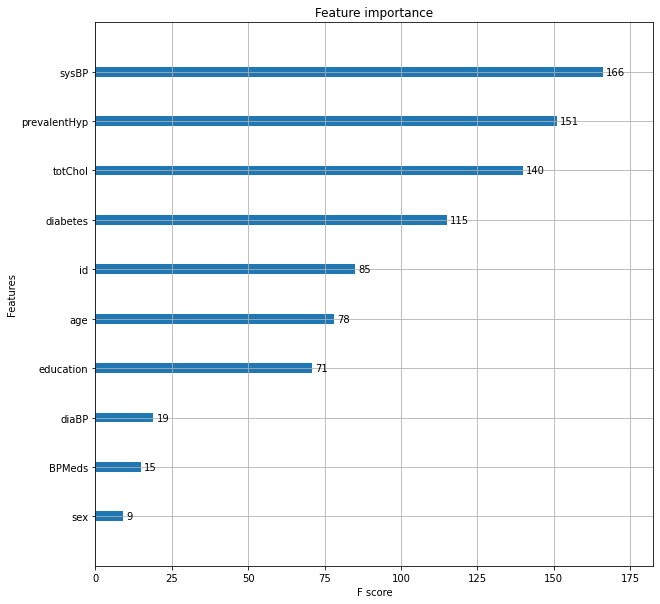

In [343]:
orig_feature_names = list(heart_data.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()